In [ ]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [ ]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
gensim.__version__

'4.3.1'

In [ ]:
np.random.seed(42)

Use Pretrained Word Vectors

In [ ]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
wv = api.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
wv.save('wv.model')

In [ ]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [ ]:
wv.similarity("apple", "car")

0.51229525

In [ ]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.48
'car'	'bicycle'	0.62
'car'	'airplane'	0.67
'car'	'cereal'	0.38
'car'	'communism'	0.01


In [ ]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('truck', 0.8638960719108582), ('driving', 0.8150991797447205), ('airplane', 0.8137863278388977), ('parked', 0.8027330636978149), ('drove', 0.8020969033241272)]


In [ ]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

sea


#### Semantic regularities captured in word embeddings

In [ ]:
wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('prince', 0.759779691696167),
 ('stone', 0.7595877051353455),
 ('queen', 0.754626989364624)]

In [ ]:
wv.most_similar(positive=['woman', 'king'], topn=3)

[('guy', 0.8665385246276855),
 ('called', 0.8582760095596313),
 ('mother', 0.8502708077430725)]

In [ ]:
words = ["one",'two','man','woman','table']

In [ ]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[-0.28042245,  1.5896969 ],
       [ 0.59239805,  1.983121  ],
       [-2.5777643 , -1.6972471 ],
       [-1.0547673 , -0.2568552 ],
       [ 3.320554  , -1.6187161 ]], dtype=float32)

### Visualizing these word vectors

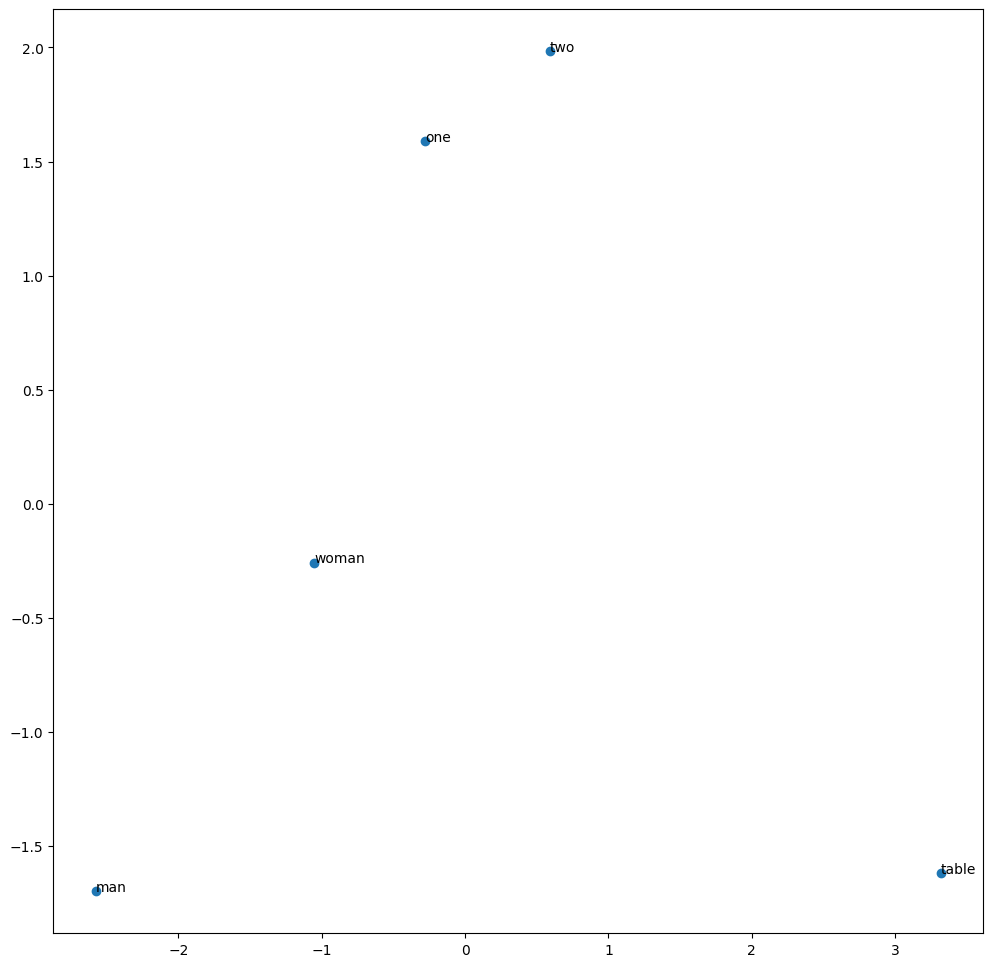

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [ ]:
data = pd.read_csv("/content/train.csv",error_bad_lines=False, engine="python")
data.head()

<ipython-input-19-17bcbbb67389>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("/content/train.csv",error_bad_lines=False, engine="python")


,text,label
0,my name is james and i am calling you from the...,1
1,oh I want you to check whether you have got th...,1
2,"Good afternoon, may I speak with the person i...",0
3,"okay, let me help you to check those charges, ...",1
4,"I'm calling from ABC Advertising, and we speci...",0


In [ ]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [ ]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)



    # print(doc)
    # print(type(doc))

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
sent_vec("I am happy")

array([ 0.11221238,  0.08086875,  0.07783688, -0.038995  , -0.18682502,
        0.17493849, -0.42813626,  0.18419874, -0.13961012, -0.1894935 ,
       -0.18459575, -0.39523976, -2.99103752, -0.0456085 , -0.02529901,
        0.33934125, -0.37086751, -0.10923225, -0.102813  ,  0.85966501,
       -0.24663988, -0.36515624,  0.20198388,  0.03161625,  0.02450538,
       -1.66976251, -0.04163662, -0.0357965 ,  0.26119274,  0.57394749,
        0.04942275, -0.32102951,  0.13673   , -0.03791625,  0.52639925,
        0.50934474, -0.22326875, -0.27457125, -0.59217638,  0.28203475,
       -2.33953753,  0.19693125,  0.2576075 , -0.14676042,  0.259737  ,
        0.10288475, -0.10105875, -0.08618125,  0.12835125, -0.84626376])

In [ ]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'third', 'beforehand', 'why', 'sometime', 'front', 'then', 'those', 'own', 'herein', 'anyhow', 'we', 'should', 'or', 'using', 'four', 'part', 'therefore', 'did', 're', 'where', 'on', 'after', 'than', 'three', 'else', 'eleven', 'during', 'take', 'meanwhile', 'without', 'several', 'hundred', 'by', 'empty', 'bottom', 'whereupon', 'both', 'how', 'between', 'nothing', 'moreover', 'whence', 'if', 'been', 'more', 'can', 'a', 'never', 'alone', 'hers', 'ever', 'though', 'and', 'please', 'become', 'someone', 'as', 'per', 'there', 'keep', 'least', 'very', 'ten', 'some', 'afterwards', 'hereby', 'off', 'via', 'only', 'less', 'even', 'could', 'her', '’d', 'regarding', 'somehow', 'does', 'who', 'namely', 'first', 'still', 'me', 'nevertheless', 'perhaps', 'when', 'go', 'against', 'get', 'every', 'often', 'what', 'such', 'although', 'see', 'yourself', 'everyone', 'whereafter', '’re', '’ve', 'once', 'these', 'within', 'therein', 'their', 'throughout', 'thereby', 'whether', 'everywhere', 'he', 'it', 'ab

In [ ]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
data['tokens'] = data['text'].apply(spacy_tokenizer)

In [ ]:
data.head()

,text,label,tokens
0,my name is james and i am calling you from the...,1,"[james, windows, technical, department, comput..."
1,oh I want you to check whether you have got th...,1,"[oh, want, check, charge, credit, card, bank]"
2,"Good afternoon, may I speak with the person i...",0,"[good, afternoon, speak, person, charge, purch..."
3,"okay, let me help you to check those charges, ...",1,"[okay, let, help, check, charge, help, refund,..."
4,"I'm calling from ABC Advertising, and we speci...",0,"[abc, advertising, specialize, create, eye, ca..."


In [ ]:
data['vec'] = data['tokens'].apply(sent_vec)

In [ ]:
data.head()

,text,label,tokens,vec
0,my name is james and i am calling you from the...,1,"[james, windows, technical, department, comput...","[0.30248744413256645, 0.09578545308775371, -0...."
1,oh I want you to check whether you have got th...,1,"[oh, want, check, charge, credit, card, bank]","[0.10539862234145403, 0.4851162526756525, -0.3..."
2,"Good afternoon, may I speak with the person i...",0,"[good, afternoon, speak, person, charge, purch...","[0.10207721259858873, 0.14583437204742544, -0...."
3,"okay, let me help you to check those charges, ...",1,"[okay, let, help, check, charge, help, refund,...","[0.28906075035532314, 0.5742841636141142, -0.5..."
4,"I'm calling from ABC Advertising, and we speci...",0,"[abc, advertising, specialize, create, eye, ca...","[0.1338569987565279, 0.45849387370981276, -0.3..."


In [ ]:
X = data['vec'].to_list()
y = data['label'].to_list()

In [ ]:
X[0]

array([ 0.30248744,  0.09578545, -0.27325322, -0.06362145, -0.08562222,
        0.04078368,  0.57928778, -0.36823167,  0.33153634, -0.241146  ,
        0.50614477,  0.30595544, -3.09884445, -0.27206222,  0.23757888,
       -0.18105966,  0.18769984,  0.33443777, -0.195862  , -0.23540667,
       -0.54530912, -0.20558044,  0.27770556, -0.1440511 , -0.48376777,
        0.21874292, -0.05782444, -0.16214775, -0.02276566,  0.24240596,
       -0.21701834, -0.41568442, -0.13245444, -0.62478333,  0.3984989 ,
       -0.03863334,  0.02881644,  0.39213934,  0.19713556, -0.15625311,
       -0.33893444,  0.73379777, -0.34660155,  0.2969629 ,  0.20509577,
       -0.02986178,  0.00647289,  0.12145956, -0.44570023,  0.16026222])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn import metrics
predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.8
Logistic Regression Precision: 0.75
Logistic Regression Recall: 1.0


In [ ]:
test_df = pd.read_csv("/content/test.csv")
test_df['tokens'] = test_df['text'].apply(spacy_tokenizer)
test_df['vec'] = test_df['tokens'].apply(sent_vec)

In [ ]:
X=test_df['vec'].to_list()
test_df['vec'][0]

array([ 0.0225875 ,  0.30087749,  0.08226502,  0.14413249, -0.36102749,
       -0.03421249, -0.240465  , -0.2404025 ,  0.434785  , -0.64145751,
       -0.0119    ,  0.050095  , -1.259175  ,  0.05828499,  0.1753525 ,
       -0.36453   , -0.34980275,  0.29554001,  0.50765   ,  0.23601456,
       -0.185955  , -0.61677501, -0.09316   , -0.28850499, -0.33248626,
        0.40938   , -0.28453249,  0.23788351, -0.051153  , -0.081061  ,
        0.17793325, -0.1085225 ,  0.05507001, -0.5578575 ,  0.74898748,
        0.1271425 ,  0.335948  , -0.08080298, -0.198675  , -0.246215  ,
        0.09263499,  0.1994345 , -0.0869945 ,  0.4142975 , -0.07934751,
        0.21217   , -0.38808749, -0.58372251, -0.0917885 ,  0.13579725])

In [ ]:
op=int(classifier.predict([X[1]]))

In [ ]:
import joblib
joblib.dump(classifier,'classifier.pkl')
print('Model saved')

model_cols = ['text']
joblib.dump(model_cols,'model_cols.pkl')
print('Saved')

Model saved
Saved


In [ ]:
vec=spacy_tokenizer("I am calling from frizzle entertainment and your credit card is stolen.")
vec=sent_vec(vec)
classifier.predict([vec])

array([1])